# Load Datasets


In [1]:
from sktime.datasets import load_tsf_to_dataframe
import pandas as pd
def load_dataset(file_path, delimiter=';'):
    """
    Load dataset based on file extension.
    .tsf files use sktime loader, others use pandas.
    """
    if file_path.endswith('.tsf'):
        return load_tsf_to_dataframe(file_path)
    else:
        return pd.read_csv(file_path, delimiter=delimiter)

In [2]:
dataset_path = './data/'
dataset_names = ['australian_electricity_demand_dataset.tsf','saugeenday_dataset.tsf', 'wti_oil_dataset.csv', 'train_egg_sales.csv', 'car_parts_dataset_without_missing_values.tsf']

    

## Australien Electricity Dateset

In [ ]:
australian_electricity_demand_dataset = load_dataset(dataset_path + dataset_names[0])
australian_electricity_demand_df = australian_electricity_demand_dataset[0]['series_value'].reset_index()
australian_electricity_demand_df = australian_electricity_demand_df[australian_electricity_demand_df['state'] == 'VIC']
australian_electricity_demand_df = australian_electricity_demand_df.rename(columns={'series_value': 'y', 'timestamp': 'ds'})
australian_electricity_demand_df = australian_electricity_demand_df[['ds', 'y']]
# Convert to datetime and set as index
australian_electricity_demand_df['ds'] = pd.to_datetime(australian_electricity_demand_df['ds'])
australian_electricity_demand_df = australian_electricity_demand_df.set_index('ds')
# Aggregate to daily
australian_electricity_demand_df = australian_electricity_demand_df.resample('D').sum()
# Reset index to get 'ds' back as a column
australian_electricity_demand_df = australian_electricity_demand_df.reset_index()
australian_electricity_demand_df.info()


In [4]:
australian_electricity_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4807 non-null   datetime64[ns]
 1   y       4807 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 75.2 KB


## Saugeen River Flow Dataset

In [5]:
saugeen_river_dataset = load_dataset(dataset_path + dataset_names[1])
saugeen_river_dataset = saugeen_river_dataset[0]['series_value'].reset_index()
saugeen_river_dataset = saugeen_river_dataset.rename(columns={'series_value': 'y', 'timestamp': 'ds'})
saugeen_river_df = saugeen_river_dataset[['ds', 'y']]
#saugeen_river_df.info()


## Wti Oil Dataset

In [6]:
wti_oil_dataset = load_dataset(dataset_path + dataset_names[2], delimiter=',')
wti_oil_dataset = wti_oil_dataset.rename(columns={'date': 'ds', 'wti': 'y'})
wti_oil_df = wti_oil_dataset[['ds', 'y']]
wti_oil_df['ds'] = pd.to_datetime(wti_oil_df['ds'])
#wti_oil_df.info()

/var/folders/7f/pn2lysgd6cx02fkc066bbrp40000gn/T/ipykernel_14227/3432737355.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_oil_df['ds'] = pd.to_datetime(wti_oil_df['ds'])


## Egg Dataset

In [7]:
egg_sales_dataset = load_dataset(dataset_path + '/egg_sales/' + dataset_names[3])
egg_sales_df = egg_sales_dataset.rename(columns={'Egg Sales': 'y', 'Date': 'ds'})
egg_sales_df['ds'] = pd.to_datetime(egg_sales_df['ds'])
#egg_sales_df.info()


# Car Parts Dataset

In [8]:
# Load the car parts TSF dataset
car_parts_dataset = load_dataset(dataset_path + dataset_names[4])
# Unpack as DataFrame, flatten multiindex if present
car_parts_df = car_parts_dataset[0]['series_value'].reset_index()
# If there’s a 'state' or similar, filter here (else skip)
# car_parts_df = car_parts_df[car_parts_df['state'] == 'YOUR_FILTER']  # Only if relevant

# Rename columns
car_parts_df = car_parts_df.rename(columns={'series_value': 'y', 'timestamp': 'ds'})
car_parts_df = car_parts_df[['ds', 'y']]
car_parts_df['ds'] = pd.to_datetime(car_parts_df['ds'])
car_parts_df = car_parts_df.sort_values('ds')
car_parts_df = car_parts_df.groupby('ds').sum().reset_index()

#car_parts_df.info()
car_parts_df.head()


,ds,y
0,1998-01-01,1789.0
1,1998-02-01,1865.0
2,1998-03-01,1738.0
3,1998-04-01,1718.0
4,1998-05-01,1507.0


## Exploration

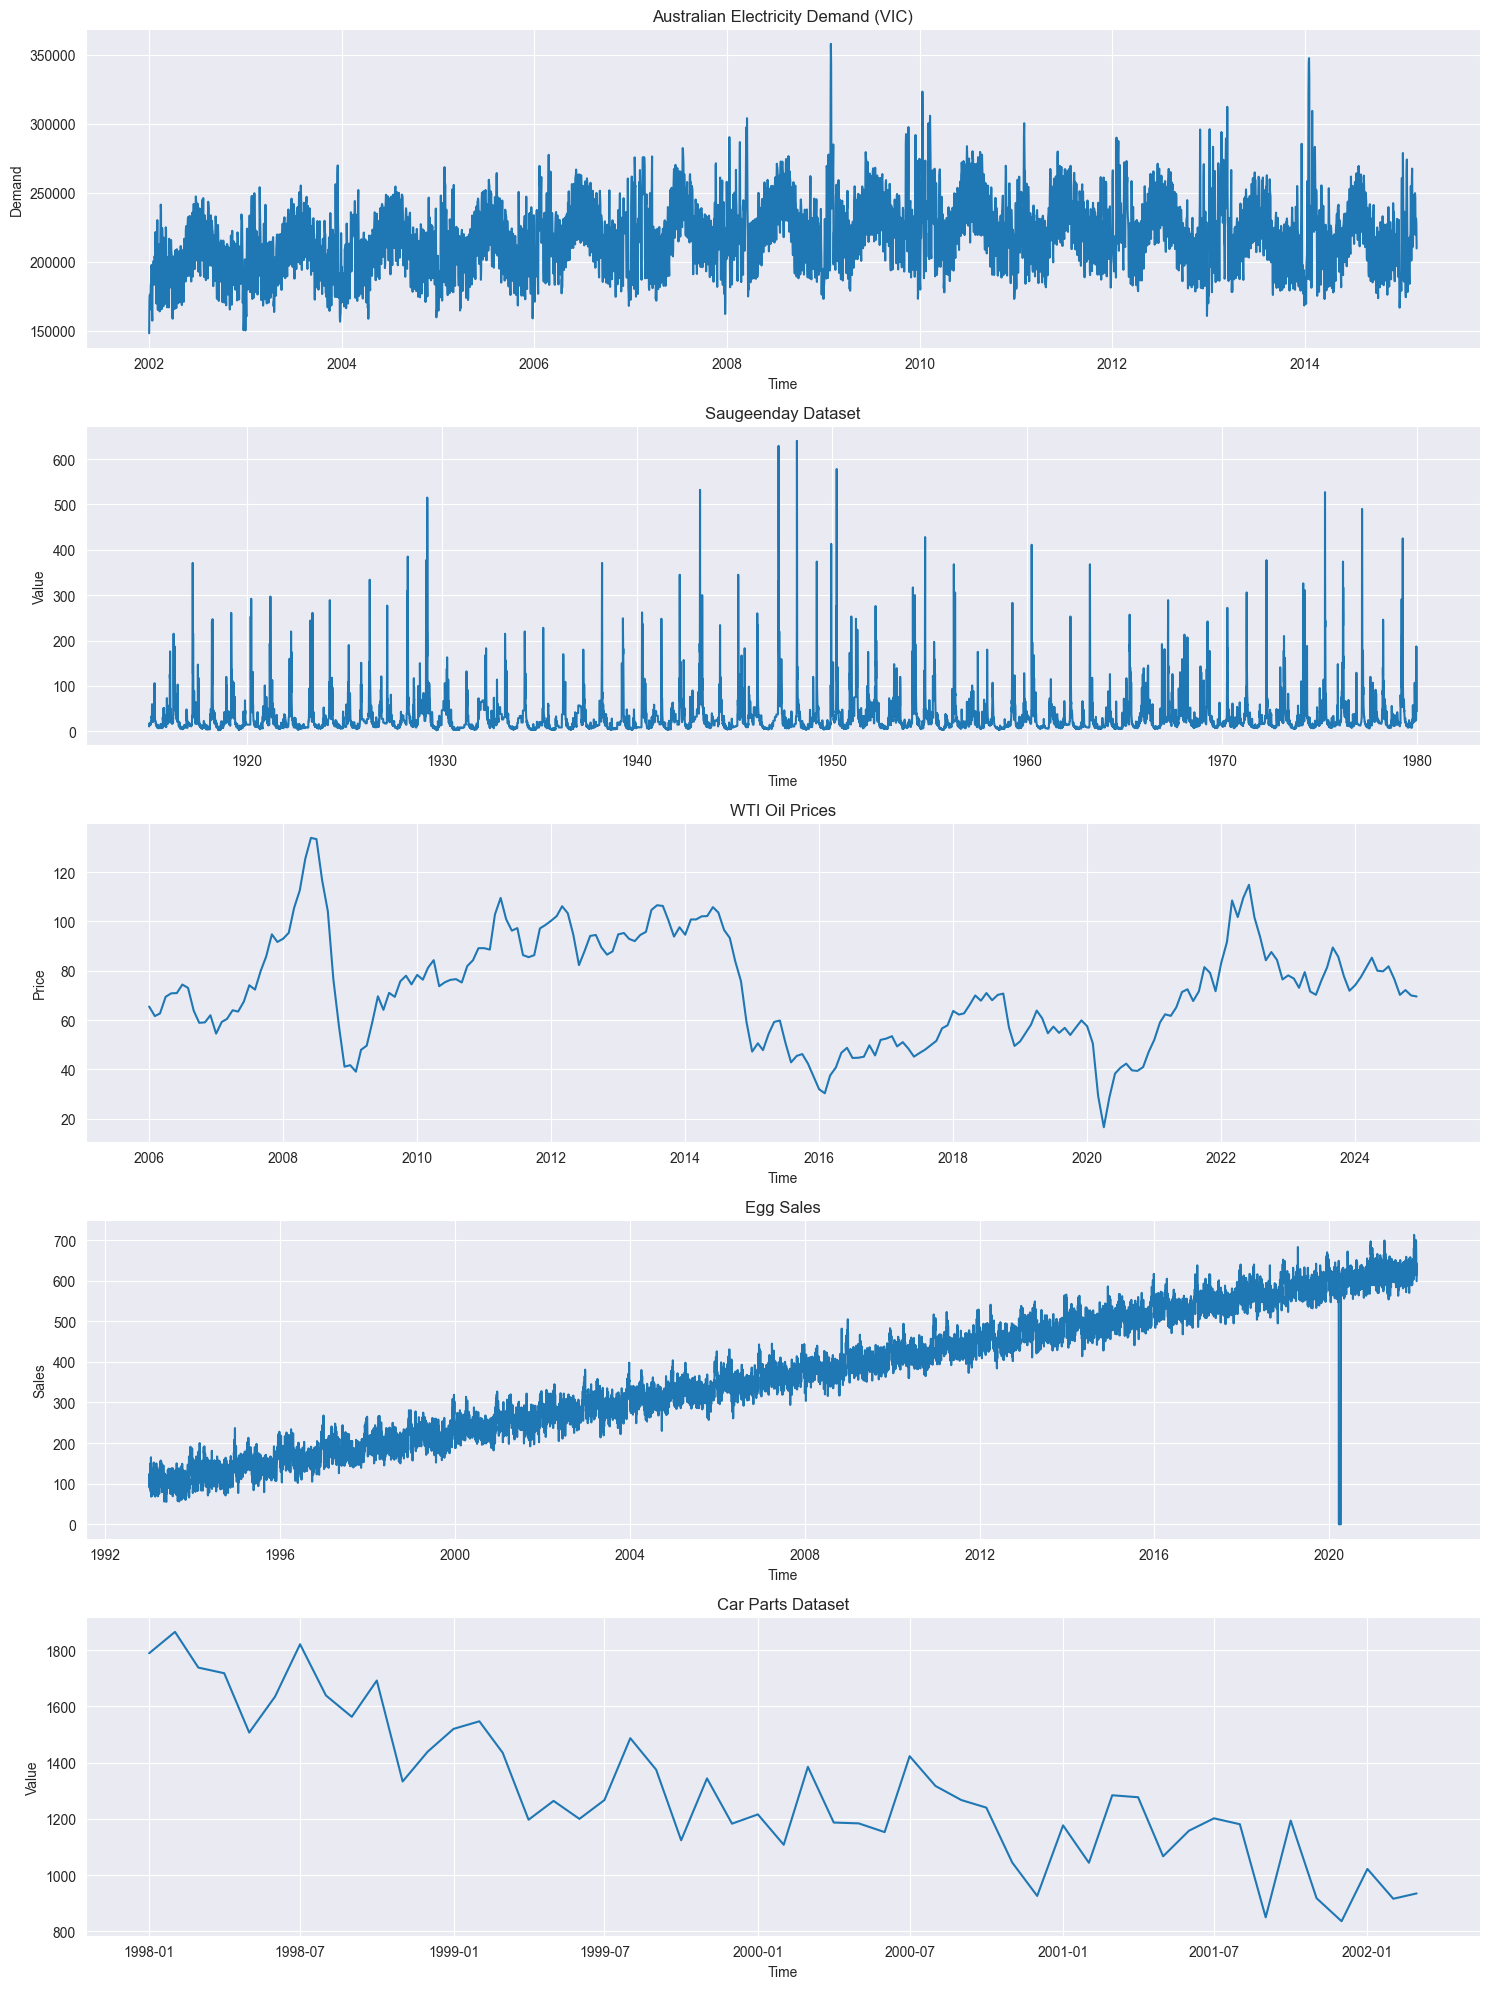

In [9]:
import matplotlib.pyplot as plt
#import seaborn as sns
if True:
    # Set style and figure size
    plt.rcParams['figure.figsize'] = [15, 10]

    # Create subplots
    fig, axes = plt.subplots(5, 1, figsize=(15, 20))

    # Plot Australian Electricity Demand
    axes[0].plot(australian_electricity_demand_df['ds'], australian_electricity_demand_df['y'])
    axes[0].set_title('Australian Electricity Demand (VIC)')
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('Demand')

    # Plot Saugeenday Dataset
    axes[1].plot(saugeen_river_df['ds'], saugeen_river_df['y'])
    axes[1].set_title('Saugeenday Dataset')
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('Value')

    # Plot WTI Oil Dataset
    axes[2].plot(wti_oil_df['ds'], wti_oil_df['y'])
    axes[2].set_title('WTI Oil Prices')
    axes[2].set_xlabel('Time')
    axes[2].set_ylabel('Price')

    # Plot Egg Sales Dataset
    axes[3].plot(egg_sales_df['ds'], egg_sales_df['y'])
    axes[3].set_title('Egg Sales')
    axes[3].set_xlabel('Time')
    axes[3].set_ylabel('Sales')

    # Plot Car Parts Dataset
    axes[4].plot(car_parts_df['ds'], car_parts_df['y'])
    axes[4].set_title('Car Parts Dataset')
    axes[4].set_xlabel('Time')
    axes[4].set_ylabel('Value')

    # Adjust layout
    plt.tight_layout()
    plt.show()
